In [100]:
import pandas as pd
import numpy as np
import scipy
from scipy import io
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
import glob
import random

from scipy.optimize import curve_fit

from astropy.io import fits
from astropy.time import Time
from astropy import units as u
import scipy.integrate as integrate
import lightkurve

from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

import math
import datetime as dt
import lightkurve.io as l
from lightkurve.io.generic import read_generic_lightcurve

In [101]:
#repository like the one we have online
general_data = pd.read_csv("C:/Users/kmanj/FITS_BD_Files/Repository_Data/Repository_vos.csv", encoding ='latin1')

In [102]:
def BIC(lst):
    max_abs_value = abs(lst[0])  # Initialize with the absolute value of the first element
    
    for value in lst[1:]:  # Start from the second element
        abs_value = abs(value)
        if abs_value > max_abs_value:
            max_abs_value = abs_value  
    return max_abs_value

In [103]:
# Function is created in order to eliminate characters which are not Printable ASCII characters that appear 
# from the data transfer from repository
def textcleaner(str1):
    w = str(str1).split('\n')[0]
    x = str(w)
    y = str(x.split('  ')[2])
    z = y.replace("'", "")
    return z

In [104]:
# Function is created in order to eliminate characters which are not Printable ASCII characters that appear 
# from the data transfer from repository
def numcleaner(str1):
    w = str(str1).split('\n')[0]
    x = str(w)
    x.split('  ')
    if ' NaN' in x:
        y = str(x.split('  ')[1])
        z = y.replace("'", "")
        a = z.replace(" ", "")
        return a
    else:
        w = str(str1).split('\n')[0]
        x = str(w)
        y = str(x.split('  ')[2])
        z = y.replace("'", "")
        return z

In [105]:
dir = '/Users/kmanj/Manjavacas Research/Vos_2022/Vos2022/'
dir_save = "C:/Users/kmanj/FITS_BD_Files/Data/Vos_2022/"

In [106]:
dwarfs_files = os.listdir(dir)
dwarf_dat = [archive for archive in dwarfs_files]
dwarf_dat

['2M0153-6744_calibch1_bin5_ap_opt.sav',
 '2M0326-2102_calibch1_bin5_ap_opt.sav',
 '2M0447+0447_calibch1_bin5_ap_opt.sav',
 '2M0459-2853_calibch1_bin5_ap_opt.sav',
 '2M0506+5236_calibch1_bin5_ap_opt.sav',
 '2M0951-8023_calibch1_bin5_ap_opt.sav',
 '2M1647+5632_calibch1_bin5_ap_opt.sav',
 '2M1741-4642_calibch1_bin5_ap_opt.sav',
 '2M2002-0521_calibch1_bin5_ap_opt.sav',
 '2M2117-2940_calibch1_bin5_ap_opt.sav',
 '2M2206-4217_calibch1_bin5_ap_opt.sav',
 '2M2216+1952_calibch1_bin5_ap_opt.sav',
 '2M2322-6151_calibch1_bin5_ap_opt.sav',
 '2M2343-3640_calibch1_bin5_ap_opt.sav']

In [107]:
len(dwarf_dat)

14

In [108]:
new_name_file = []
new_name = []

# Iterate over the elements of the first list.
for archivo in dwarf_dat:
    # Extract the first 5 characters of the file name
    first_5_characteres = 'J' + archivo[2:6]
    
    # Iterate over the elements of the second list.
    for valor in general_data['Name_file']:
        # Extract the first 5 characters of the reference value
        valor = str(valor)
        first_5_values = valor[:5]
        # Compare the first 5 characters of the two elements
        if first_5_characteres == first_5_values:
            # Modify the file name to the desired format
            nuevo_nombre = valor + ".dat"
            # Add the new name to the new list
            new_name.append(valor)
            new_name_file.append(nuevo_nombre)
            # Break the inner loop once a match is found.
            break

new_name_file
new_name;

In [109]:
Reference = 'Vos et al 2022 ApJ 924 68'
Telescope = 'Spitzer Space Telescope'
Instrument = 'Spitzer IRAC'
Band_obs = 'Channel 1 [3.6 microns]'

In [110]:
Object = []
SpectralType = []
Jmag = []
dJmag = []
Hmag = []
dHmag = []
Kmag = []
dKmag = []
RA = []
DEC = []
TSTART = [
    58563.80699074,
    58463.25583333,
    58634.25648148,
    58620.32697917,
    58655.78134259,
    58666.88089120,
    58410.42792824,
    58712.42958333,
    58501.78552083,
    58734.05140046,
    58768.04368056,
    58579.52048611,
    58508.52503472,
    58408.64513889
]

TSTOP = [
    58564.73208333,
    58464.18093750,
    58635.18157407,
    58621.25209491,
    58656.70645833,
    58667.80599537,
    58411.35303241,
    58713.35468750,
    58502.71062500,
    58734.97650463,
    58768.96877315,
    58580.44559028,
    58509.45013889,
    58409.57024306
]


for i in range(len(new_name_file)):     
    Object.append(textcleaner(general_data['Name'][general_data['Name_file'] == new_name[i]]))
    SpectralType.append(textcleaner(general_data['SpT'][general_data['Name_file'] == new_name[i]]))
    Jmag.append(textcleaner(general_data['J'][general_data['Name_file'] == new_name[i]]))
    dJmag.append(textcleaner(general_data['dJ'][general_data['Name_file'] == new_name[i]]))
    Hmag.append(numcleaner(general_data['H'][general_data['Name_file'] == new_name[i]]))
    dHmag.append(numcleaner(general_data['dH'][general_data['Name_file'] == new_name[i]]))
    Kmag.append(numcleaner(general_data['K'][general_data['Name_file'] == new_name[i]]))
    dKmag.append(numcleaner(general_data['dK'][general_data['Name_file'] == new_name[i]]))
    RA.append(textcleaner(general_data['RA'][general_data['Name_file'] == new_name[i]]))
    DEC.append(general_data['DEC'][general_data['Name_file'] == new_name[i]])

dec = []
for i in DEC:
    x = str(i).split(' ')[3]
    y = x.split('\n')[0]
    dec.append(y)
dec[4] = '52.60925'
dec[6] = '56.534917'
dec[11] = '19.880028'

In [111]:
dwarf_bic = []
for i in range(len(dwarf_dat)):
    s = scipy.io.readsav(dir + dwarf_dat[i])
    if 'delta_bic' in s:
        dwarf_bic.append(dwarf_dat[i])
    else:
        print(i)

In [112]:
dwarf_dat[6]

'2M1647+5632_calibch1_bin5_ap_opt.sav'

In [113]:
len(new_name)

14

In [114]:
name_files = []
# Especifique el nombre del archivo de texto
for i in range(len(dwarf_dat)):
    red = []
    
    s = scipy.io.readsav(dir + dwarf_dat[i])
    
    if 'delta_bic' in s:
        bmod = BIC(s['delta_bic'])
        ind = next(i for i, x in enumerate(s['delta_bic']) if x == bmod or x == -bmod)
        x = s['BINT']
        y = s['BINFLUX']
        x1 = []
        flux1 = []
        
        for element in x:
            x1.append(element[0])
        for element in y:
            flux1.append(element[0])
            
        lc = l.LightCurve(time = list(x1) * u.h, flux = list(flux1) * u.dimensionless_unscaled)
        print(lc)
    else:
        red.append(dwarf_dat[i])
    lc.to_fits(path = dir_save + Object[i] + '_Vos2022.fits')
    name_files.append(dir_save + Object[i] + '_Vos2022.fits')
    

         time                flux        flux_err
                                                 
--------------------- ------------------ --------
0.0023703893336157003 0.9878454804420471      nan
 0.004458363788823287 1.0029208660125732      nan
 0.006472269694010417 0.9992969036102295      nan
 0.008418846254547438 0.9918552041053772      nan
 0.010435104370117188 0.9973803162574768      nan
 0.012233797460794449 0.9975067377090454      nan
 0.014465395361185074  1.002975344657898      nan
  0.01655089110136032 1.0036300420761108      nan
 0.018569437166055042 0.9970158338546753      nan
 0.020872687300046284 1.0047197341918945      nan
                  ...                ...      ...
   0.8064374923706055  1.001520037651062      nan
   0.8089561462402344 0.9916755557060242      nan
   0.8109721342722574 1.0001928806304932      nan
   0.8127707640329996 0.9936455488204956      nan
   0.8149305979410807  0.996832013130188      nan
    0.816946824391683 1.0018361806869507      nan


        time                flux        flux_err
                                                
-------------------- ------------------ --------
0.002666695974767208 0.9903011918067932      nan
0.005187495611608028 1.0011423826217651      nan
0.007636610418558121 0.9989851117134094      nan
0.009865744660298029  0.994966983795166      nan
0.011884308109680811 0.9967311024665833      nan
 0.01368056982755661 0.9942883253097534      nan
0.015699084848165512 0.9979708194732666      nan
0.017643563449382782 0.9978024363517761      nan
 0.01944214478135109 1.0006877183914185      nan
0.021238453686237335 1.0048187971115112      nan
                 ...                ...      ...
  0.8297708829243978 0.9987050890922546      nan
  0.8318541049957275  0.999588668346405      nan
   0.834231456120809  1.002204418182373      nan
  0.8361783027648926 1.0013664960861206      nan
  0.8380463918050131 1.0034340620040894      nan
  0.8401366074879965 0.9965501427650452      nan
  0.8419329325358073

In [115]:
name_files

['C:/Users/kmanj/FITS_BD_Files/Data/Vos_2022/2MASSJ01531463-6744181_Vos2022.fits',
 'C:/Users/kmanj/FITS_BD_Files/Data/Vos_2022/2MASSJ03264225-2102057_Vos2022.fits',
 'C:/Users/kmanj/FITS_BD_Files/Data/Vos_2022/PSOJ071.8769-12.2713_Vos2022.fits',
 'C:/Users/kmanj/FITS_BD_Files/Data/Vos_2022/2MASSJ04590034-2853396_Vos2022.fits',
 'C:/Users/kmanj/FITS_BD_Files/Data/Vos_2022/2MASSJ05065012+5236338_Vos2022.fits',
 'C:/Users/kmanj/FITS_BD_Files/Data/Vos_2022/2MASSJ09512690-8023553_Vos2022.fits',
 'C:/Users/kmanj/FITS_BD_Files/Data/Vos_2022/2MASSJ16471580+5632057_Vos2022.fits',
 'C:/Users/kmanj/FITS_BD_Files/Data/Vos_2022/2MASSJ17410280-4642218_Vos2022.fits',
 'C:/Users/kmanj/FITS_BD_Files/Data/Vos_2022/2MASSJ20025073-0521524_Vos2022.fits',
 'C:/Users/kmanj/FITS_BD_Files/Data/Vos_2022/2MASSJ21171431-2940034_Vos2022.fits',
 'C:/Users/kmanj/FITS_BD_Files/Data/Vos_2022/2MASSWJ2206450-421721_Vos2022.fits',
 'C:/Users/kmanj/FITS_BD_Files/Data/Vos_2022/PSOJ334.1193+19.8800_Vos2022.fits',
 'C:/User

In [116]:
for i in range(len(dwarf_dat)):
    with fits.open(name_files[i], mode = 'update') as f:
        f[0].header['OBJECT'] = Object[i]
        f[0].header['SPECTYPE'] = SpectralType[i]
        f[0].header['TSTART'] = TSTART[i]
        f[0].header['TSTOP'] = TSTOP[i]
        f[0].header['TIMESYS'] = 'mjd'
        f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
        f[0].header['INSTRUME'] = Instrument
        f[0].header['FILTER'] = Band_obs
        f[0].header['VOREF'] = Reference
        f[0].header['RA_OBJ'] = RA[i]
        f[0].header['DEC_OBJ'] = dec[i]
        f[0].header['JMAG'] = Jmag[i] + '+/-' + dJmag[i]
        f[0].header['HMAG'] = Hmag[i] + '+/-' + dHmag[i]
        f[0].header['KMAG'] = Kmag[i] + '+/-' + dKmag[i]

### Objects w/o Presented BIC values

In [117]:
dir = '/Users/kmanj/Manjavacas Research/Vos_2022/Voss2022_1/'
dir_save = "C:/Users/kmanj/FITS_BD_Files/Data/Vos_2022/"

In [118]:
dwarfs_files = os.listdir(dir)
dwarf_dat = [archive for archive in dwarfs_files]
dwarf_dat

['2M0045+16_calibch1_bin2_ap3.sav',
 '2M0045+16_calibch2_bin2_ap0.sav',
 '2M0501-00_calibch1_bin2_ap0.sav',
 '2M1425-36_calibch1_bin2_ap1.sav']

In [119]:
new_name_file = []
new_name = []

# Iterate over the elements of the first list.
for archivo in dwarf_dat:
    # Extract the first 5 characters of the file name
    first_5_characteres = 'J' + archivo[2:6]
    
    # Iterate over the elements of the second list.
    for valor in general_data['Name_file']:
        # Extract the first 5 characters of the reference value
        valor = str(valor)
        first_5_values = valor[:5]
        # Compare the first 5 characters of the two elements
        if first_5_characteres == first_5_values:
            # Modify the file name to the desired format
            nuevo_nombre = valor + ".dat"
            # Add the new name to the new list
            new_name.append(valor)
            new_name_file.append(nuevo_nombre)
            # Break the inner loop once a match is found.
            break

new_name_file;
new_name

['J0045+16', 'J0045+16', 'J0501-00', 'J1425-36']

In [120]:
Object = []
SpectralType = []
Jmag = []
dJmag = []
Hmag = []
dHmag = []
Kmag = []
dKmag = []
RA = []
DEC = []
TSTART = [
    56972.00000000,
    56972.00000000,
    56972.00000000,
    57251.00000000
]

TSTOP = [
    57251.00000000,
    57251.00000000,
    57824.00000000,
    57826.00000000    
]

for i in range(len(new_name_file)):     
    Object.append(textcleaner(general_data['Name'][general_data['Name_file'] == new_name[i]]))
    SpectralType.append(textcleaner(general_data['SpT'][general_data['Name_file'] == new_name[i]]))
    Jmag.append(textcleaner(general_data['J'][general_data['Name_file'] == new_name[i]]))
    dJmag.append(textcleaner(general_data['dJ'][general_data['Name_file'] == new_name[i]]))
    Hmag.append(numcleaner(general_data['H'][general_data['Name_file'] == new_name[i]]))
    dHmag.append(numcleaner(general_data['dH'][general_data['Name_file'] == new_name[i]]))
    Kmag.append(numcleaner(general_data['K'][general_data['Name_file'] == new_name[i]]))
    dKmag.append(numcleaner(general_data['dK'][general_data['Name_file'] == new_name[i]]))
    RA.append(textcleaner(general_data['RA'][general_data['Name_file'] == new_name[i]]))
    DEC.append(general_data['DEC'][general_data['Name_file'] == new_name[i]])

dec = []
for i in DEC:
    x = str(i).split(' ')[3]
    y = x.split('\n')[0]
    dec.append(y)
dec[0] = '16.54575'
dec[1] = '16.54575'
dec

['16.54575', '16.54575', '-0.179217', '-36.842246']

In [121]:
s = scipy.io.readsav('C:/Users/kmanj/Manjavacas Research/Vos_2022/Voss2022_1/2M0045+16_calibch1_bin2_ap3.sav')

t = []
flux = []
for i in s['bint']:
    t.append(i[0] + 6.716797)
for i in s['binflux']:
    flux.append(i[0])

lc = l.LightCurve(time = list(t)*u.h, flux = list(flux) *u.dimensionless_unscaled)   
lc.to_fits(dir_save + '2MASS_J00452143+1634446_Ch1_Vos2022.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x00000259B7DAE500>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000259B7DAE2F0>]

In [122]:
# Save the DataFrame as a text file
#we can add or not the eflux line depends on the originally data include the errors (eflux (normalized as flux))
with fits.open(dir_save + '2MASS_J00452143+1634446_Ch1_Vos2022.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object[0]
    f[0].header['SPECTYPE'] = SpectralType[0]
    f[0].header['TSTART'] = TSTART[0]
    f[0].header['TSTOP'] = TSTOP[0]
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA[0]
    f[0].header['DEC_OBJ'] = dec[0]
    f[0].header['JMAG'] = Jmag[0] + '+/-' + dJmag[0]
    f[0].header['HMAG'] = Hmag[0] + '+/-' + dHmag[0]
    f[0].header['KMAG'] = Kmag[0] + '+/-' + dKmag[0]

In [123]:
s = scipy.io.readsav('C:/Users/kmanj/Manjavacas Research/Vos_2022/Voss2022_1/2M0045+16_calibch1_bin2_ap3.sav')
s

{'t': array([0.        , 0.00860596, 0.01721191, 0.02581787, 0.03442383,
        0.04330444, 0.05166626, 0.06054688, 0.06915283, 0.07775879,
        0.08639526, 0.09500122, 0.10360718, 0.11221313, 0.12081909,
        0.12942505, 0.13830566, 0.14663696, 0.15551758, 0.16415405,
        0.17279053, 0.18139648, 0.19000244, 0.1986084 , 0.20721436,
        0.21609497, 0.22442627, 0.2333374 , 0.24194336, 0.25054932,
        0.25915527, 0.26776123, 0.2763672 , 0.28497314, 0.29385376,
        0.30221558, 0.3110962 , 0.3194275 , 0.32833862, 0.33694458,
        0.34555054, 0.3541565 , 0.36276245, 0.3713684 , 0.37997437,
        0.38885498, 0.39749146, 0.4060974 , 0.41470337, 0.42333984,
        0.4319458 , 0.44055176, 0.4491577 , 0.45776367, 0.46636963,
        0.4749756 , 0.48388672, 0.49249268, 0.50109863, 0.5097046 ,
        0.51831055, 0.5269165 , 0.53552246, 0.5441284 , 0.5527649 ,
        0.561676  , 0.5700073 , 0.57888794, 0.5874939 , 0.59609985,
        0.6047058 , 0.61331177, 0.6219177 ,

In [124]:
len(s['binflux'][0])

7

(0.0, 13.0)

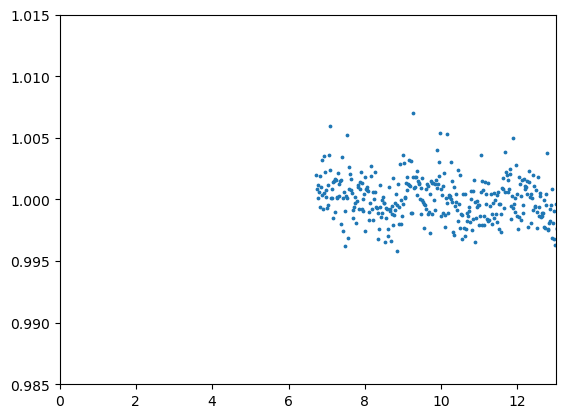

In [125]:
t = []
flux = []
for i in s['bint']:
    t.append(i[0] + 6.716797)
for i in s['binflux']:
    flux.append(i[0])

plt.scatter(t, flux, s = 3)
plt.ylim(0.985, 1.015)
plt.xlim(0, 13)

In [126]:
s = scipy.io.readsav('C:/Users/kmanj/Manjavacas Research/Vos_2022/Voss2022_1/2M0045+16_calibch2_bin2_ap0.sav')

t = []
flux = []
for i in s['bint']:
    t.append(i[0])
for i in s['binflux']:
    flux.append(i[0])

lc = l.LightCurve(time = list(t)*u.h, flux = list(flux) * u.dimensionless_unscaled)
lc.to_fits(dir_save + '2MASS_J00452143+1634446_Ch2_Vos2022.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x00000259A9FC7940>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000259B7DD30D0>]

In [127]:
# Save the DataFrame as a text file
#we can add or not the eflux line depends on the originally data include the errors (eflux (normalized as flux))
with fits.open(dir_save + '2MASS_J00452143+1634446_Ch2_Vos2022.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object[1]
    f[0].header['SPECTYPE'] = SpectralType[1]
    f[0].header['TSTART'] = TSTART[1]
    f[0].header['TSTOP'] = TSTOP[1]
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA[1]
    f[0].header['DEC_OBJ'] = dec[1]
    f[0].header['JMAG'] = Jmag[1] + '+/-' + dJmag[1]
    f[0].header['HMAG'] = Hmag[1] + '+/-' + dHmag[1]
    f[0].header['KMAG'] = Kmag[1] + '+/-' + dKmag[1]

In [128]:
s = scipy.io.readsav('C:/Users/kmanj/Manjavacas Research/Vos_2022/Voss2022_1/2M0501-00_calibch1_bin2_ap0.sav')
s

{'t': array([0.0000000e+00, 8.3160400e-03, 1.7211914e-02, ..., 2.0292496e+01,
        2.0301102e+01, 2.0309723e+01], dtype=float32),
 'jd': array([58505.8256022, 58505.8259585, 58505.8263241, ..., 58506.6711294,
        58506.6714905, 58506.6718516]),
 'flux': array([[0.99825966,        nan,        nan, ..., 0.9941928 , 0.9919806 ,
         1.0049888 ],
        [1.0041153 ,        nan,        nan, ..., 1.0023888 , 1.0005162 ,
         1.005068  ],
        [1.0062653 ,        nan,        nan, ..., 0.99505466, 0.9937026 ,
         1.0048225 ],
        ...,
        [0.99518144,        nan,        nan, ..., 1.0069857 , 1.0044892 ,
         1.0018119 ],
        [0.9970248 ,        nan,        nan, ..., 0.9672155 , 1.0049573 ,
         0.9976067 ],
        [1.001942  ,        nan,        nan, ..., 0.95422226, 1.0314281 ,
         1.001164  ]], dtype=float32),
 'rms': 0.0027765785,
 'resultsin': array([1.83432157e-03, 1.97206822e+00, 1.82637291e+01, 1.00004336e+00]),
 'fwhm': array([2.7863142

(0.985, 1.015)

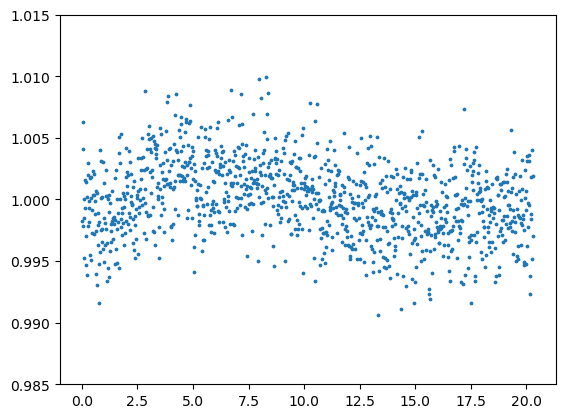

In [129]:
t = []
flux = []
for i in s['bint']:
    t.append(i[0])
for i in s['binflux']:
    flux.append(i[0])

plt.scatter(t, flux, s = 3)
plt.ylim(0.985, 1.015)
#plt.xlim(0, 13)

In [130]:
s = scipy.io.readsav('C:/Users/kmanj/Manjavacas Research/Vos_2022/Voss2022_1/2M0501-00_calibch1_bin2_ap0.sav')

t = []
flux = []
for i in s['bint']:
    t.append(i[0])
for i in s['binflux']:
    flux.append(i[0])


lc = l.LightCurve(time = list(t)*u.h, flux = list(flux) * u.dimensionless_unscaled)
lc.to_fits(dir_save + '2MASS_J05012406−0010452_Ch1_Vos2022.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x00000259B7D6E230>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000259B7DAD0C0>]

In [131]:
with fits.open(dir_save + '2MASS_J05012406−0010452_Ch1_Vos2022.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object[2]
    f[0].header['SPECTYPE'] = SpectralType[2]
    f[0].header['TSTART'] = TSTART[2]
    f[0].header['TSTOP'] = TSTOP[2]
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA[2]
    f[0].header['DEC_OBJ'] = dec[2]
    f[0].header['JMAG'] = Jmag[2] + '+/-' + dJmag[2]
    f[0].header['HMAG'] = Hmag[2] + '+/-' + dHmag[2]
    f[0].header['KMAG'] = Kmag[2] + '+/-' + dKmag[2]


In [132]:
s = scipy.io.readsav('C:/Users/kmanj/Manjavacas Research/Vos_2022/Voss2022_1/2M1425-36_calibch1_bin2_ap1.sav')
s

{'t': array([0.        , 0.00888062, 0.01751709, 0.02612305, 0.034729  ,
        0.04333496, 0.05194092, 0.06054688, 0.06915283, 0.07778931,
        0.08666992, 0.09500122, 0.10388184, 0.11248779, 0.12109375,
        0.1296997 , 0.13830566, 0.14694214, 0.15557861, 0.16418457,
        0.17279053, 0.18167114, 0.1902771 , 0.19888306, 0.20748901,
        0.21609497, 0.22473145, 0.2333374 , 0.24194336, 0.25054932,
        0.25942993, 0.2680664 , 0.27667236, 0.28527832, 0.29388428,
        0.30249023, 0.3111267 , 0.31973267, 0.32833862, 0.33694458,
        0.34555054, 0.35443115, 0.3630371 , 0.37164307, 0.3888855 ,
        0.39752197, 0.40612793, 0.4147339 , 0.42333984, 0.43222046,
        0.44055176, 0.4494629 , 0.45806885, 0.4666748 , 0.47528076,
        0.48388672, 0.49249268, 0.50109863, 0.51000977, 0.51831055,
        0.5272217 , 0.53582764, 0.5444336 , 0.55303955, 0.5616455 ,
        0.57025146, 0.57891846, 0.5878296 , 0.5961304 , 0.6050415 ,
        0.6133423 , 0.6308594 , 0.63946533,

(0.985, 1.015)

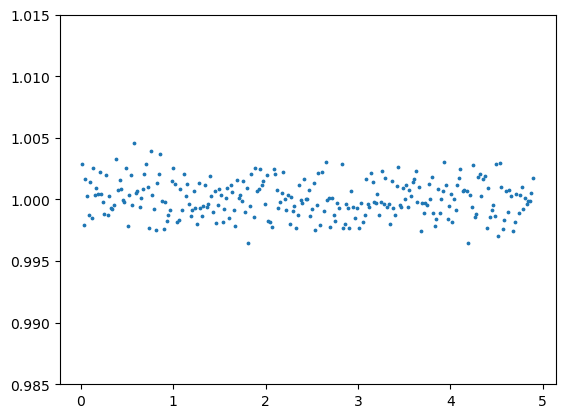

In [133]:
t = []
flux = []
for i in s['bint']:
    t.append(i[0])
for i in s['binflux']:
    flux.append(i[0])

plt.scatter(t, flux, s = 3)
plt.ylim(0.985, 1.015)
#plt.xlim(0, 13)

In [134]:
s = scipy.io.readsav('C:/Users/kmanj/Manjavacas Research/Vos_2022/Voss2022_1/2M1425-36_calibch1_bin2_ap1.sav')

t = []
flux = []
for i in s['bint']:
    t.append(i[0])
for i in s['binflux']:
    flux.append(i[0])

lc = l.LightCurve(time = list(t)*u.h, flux = list(flux) * u.dimensionless_unscaled)
lc.to_fits(dir_save + '2MASS_J14252798−3650229_Ch1_Vos2022.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x00000259B7E63040>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000259B93195A0>]

In [135]:
with fits.open(dir_save + '2MASS_J14252798−3650229_Ch1_Vos2022.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object[3]
    f[0].header['SPECTYPE'] = SpectralType[3]
    f[0].header['TSTART'] = TSTART[3]
    f[0].header['TSTOP'] = TSTOP[3]
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA[3]
    f[0].header['DEC_OBJ'] = dec[3]
    f[0].header['JMAG'] = Jmag[3] + '+/-' + dJmag[3]
    f[0].header['HMAG'] = Hmag[3] + '+/-' + dHmag[3]
    f[0].header['KMAG'] = Kmag[3] + '+/-' + dKmag[3]

<Axes: xlabel='Time [JD]', ylabel='Flux'>

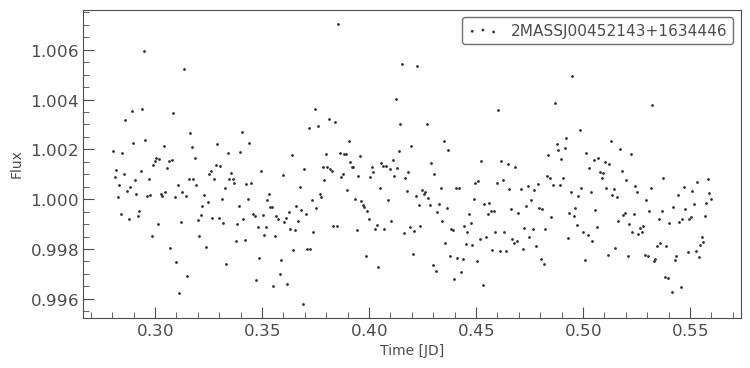

In [136]:
lc = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Vos_2022/2MASS_J00452143+1634446_Ch1_Vos2022.fits", time_format = 'jd')
lc.scatter()

In [137]:
lc.time

<Time object: scale='tdb' format='jd' value=[0.28040441 0.28112158 0.2818451  0.28256862 0.28328642 0.28400422
 0.28472138 0.28544426 0.28616143 0.28688622 0.28760402 0.28832118
 0.28904407 0.28976822 0.29048539 0.29120255 0.29192544 0.29264387
 0.29336167 0.29408519 0.29480235 0.29551952 0.29624876 0.29696656
 0.29768499 0.29840216 0.29911932 0.29984284 0.30056636 0.30128352
 0.30200069 0.30271849 0.30344328 0.30416616 0.30488333 0.30560049
 0.30631829 0.30704181 0.30776533 0.30848313 0.30920029 0.30991873
 0.31064161 0.3113645  0.31208166 0.31279946 0.31351853 0.31424141
 0.3149643  0.31568146 0.3163999  0.31711706 0.31784567 0.3185641
 0.3192819  0.3199997  0.32071686 0.32143975 0.32216263 0.32288107
 0.32395808 0.32468097 0.32539813 0.32612229 0.32683945 0.32755662
 0.32827378 0.32900429 0.32972209 0.33043925 0.33115642 0.3318793
 0.3325971  0.33332062 0.33403842 0.33475622 0.33548546 0.33620326
 0.33692043 0.33763759 0.33835475 0.33907954 0.33979734 0.34052023
 0.34123739 0.341954